#  逻辑回归与数据可视化

## Titanic 逻辑回归分析

### 导入Titanic数据

In [1]:
import seaborn as sns

In [2]:
sns.load_dataset("titanic")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic = sns.load_dataset("titanic")

## 变量初步可视化及筛选

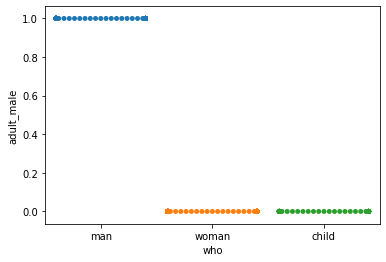

In [4]:
sns.swarmplot(x="who", y="adult_male", data=titanic);

在这里可以看到仅从who变量中就能分析出乘船人员的身份情况共分为三类（男性、女性、孩童）；可以省去adult_male这个变量。同理，sex和who也是重复变量可以删去一个。
综上，我将省去adult_male和sex变量。

In [5]:
x=[2,8,10,11,12,13]
titanic.drop(titanic.columns[x], axis=1, inplace=True)

In [6]:
titanic = titanic.dropna()#删除缺失值

In [7]:
titanic

,survived,pclass,age,sibsp,parch,fare,embarked,who,alone
0,0,3,22.0,1,0,7.2500,S,man,False
1,1,1,38.0,1,0,71.2833,C,woman,False
2,1,3,26.0,0,0,7.9250,S,woman,True
3,1,1,35.0,1,0,53.1000,S,woman,False
4,0,3,35.0,0,0,8.0500,S,man,True
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,Q,woman,False
886,0,2,27.0,0,0,13.0000,S,man,True
887,1,1,19.0,0,0,30.0000,S,woman,True
889,1,1,26.0,0,0,30.0000,C,man,True


## 逻辑回归

### 导入包

In [8]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection#拆分训练集和测试集
from sklearn.metrics import confusion_matrix#输出混淆矩阵

### 数值化处理

In [9]:
titanic_dummy = pd.get_dummies(titanic[['who', 'embarked','alone']])

In [10]:
titanic_conti = pd.DataFrame(titanic, columns=['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], index=titanic.index)
titanic = titanic_conti.join(titanic_dummy)

In [11]:
titanic

,survived,pclass,age,sibsp,parch,fare,alone,who_child,who_man,who_woman,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,False,0,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,True,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,False,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,0,0,1,0,1,0
886,0,2,27.0,0,0,13.0000,True,0,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,True,0,0,1,0,0,1
889,1,1,26.0,0,0,30.0000,True,0,1,0,1,0,0


### 逻辑回归

#### 划分训练集和测试集

In [12]:
X = titanic.iloc[:, 1:]
y = titanic.iloc[:, 0]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
# 基于训练集使用逻辑回归建模
classifier = LogisticRegression(random_state=0,solver='liblinear')
classifier.fit(X_train, y_train)
 
# 将模型应用于测试集并查看混淆矩阵
y_pred = classifier.predict(X_test)

#### 混淆矩阵分析

In [14]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)  

[[105  20]
 [ 27  62]]


In [15]:
classifier.score(X_test, y_test)#正确率

0.780373831775701

## 例二：面膜数据可视化

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#解决中文显示问题
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

In [17]:
mask = pd.read_csv('mask.csv',encoding="gbk")   #数据来源狗熊会
mask.head()

,名称,价格,月销量,评价数,店铺所在地,适合肤质,产地,补水保湿,美白提亮,控油祛痘,清洁毛孔,提拉紧致
0,ANGLEE,254.0,40,3133,湖南,任何肤质,中国,1,1,0,0,0
1,ANGLEE,350.0,62,876,浙江,任何肤质,中国,1,1,0,0,0
2,ANGLEE,284.9,12,16,浙江,任何肤质,中国,1,0,1,1,0
3,BF,289.0,32,175,英国,任何肤质,中国,1,0,0,0,0
4,BSR,379.9,1407,13870,安徽,任何肤质,中国,1,0,0,0,0


### 数据清洗

In [18]:
print(mask['产地'].unique())
print(mask['店铺所在地'].unique())
print(mask['适合肤质'].unique())

['中国' '日本' '韩国' '美国' '英国' '其他/other']
['湖南' '浙江' '英国' '安徽' '广东' '湖北' '江苏' '上海' '江西' '北京' '海外' '天津' '山东' '河南'
 '新加坡' '河北' '辽宁' '四川' '重庆' '福建' '内蒙古' '海南' '云南' '广西' '陕西' '黑龙江']
['任何肤质' '干性肤质' '油性及混合性肤质' '中性及干性肤质' '混合型肤质' '敏感性肤质' '中性肤质' '油性肤质']


In [19]:
mask.loc[mask.店铺所在地 == '英国','店铺所在地']= '海外'
mask.loc[mask.店铺所在地 == '新加坡','店铺所在地'] = '海外'
mask.loc[mask.产地 == '其他/other','产地'] = '其他'
mask.loc[mask.适合肤质 != '任何肤质','适合肤质'] = '其他'

### 数据可视化

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24191 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 19996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27993 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 19978 missing from current font.


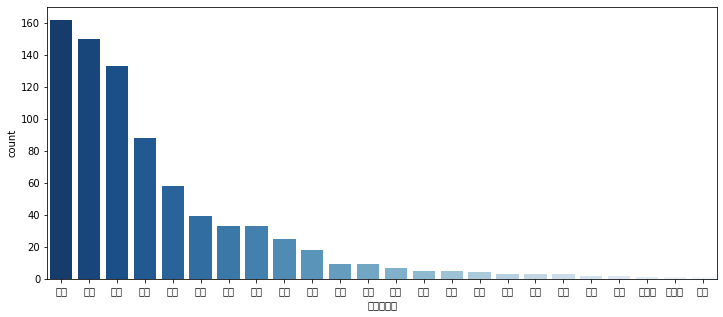

In [20]:
plt.figure(figsize=(12,5))
sns.countplot('店铺所在地',data=mask,order = mask['店铺所在地'].value_counts().index,palette='Blues_r')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26041 missing from current font.


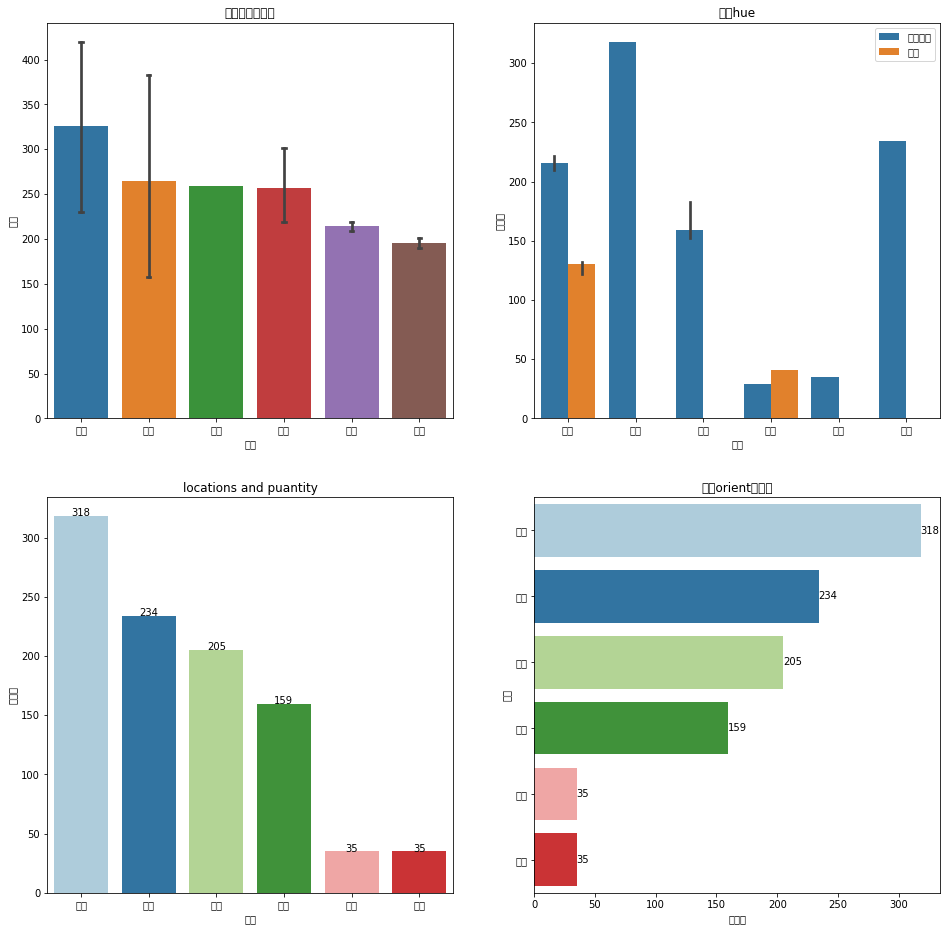

In [21]:
from numpy import median

fig=plt.figure(figsize=(16,16))
ax=fig.add_subplot(2,2,1)
sns.barplot(x="产地", y="价格",data=mask, estimator=mean,ci=75,order=['美国', '韩国','英国','日本', '其他','中国'],capsize = 0.05) 
plt.title('产地价格直方图')

ax=fig.add_subplot(2,2,2)
sns.barplot(x="产地", y="月销量",hue="适合肤质", data=mask, estimator=median,ci=20)
plt.title('指定hue')
plt.legend(loc='upper right')

ax=fig.add_subplot(2,2,3)
bardata = mask[['产地','月销量']].groupby(['产地']).median().sort_values(by='月销量',ascending = False).reset_index()
g = sns.barplot(x="产地", y="月销量",data=bardata, palette="Paired")
for index,row in bardata.iterrows():
    g.text(row.name,row.月销量,int(row.月销量),color="black",ha="center") 
plt.title('locations and puantity')

ax=fig.add_subplot(2,2,4)
g = sns.barplot(x="月销量", y="产地",data=bardata, palette="Paired",orient = "h")
for index,row in bardata.iterrows():
    g.text(row.月销量,row.name,int(row.月销量),color="black",va="center") 
plt.title('指定orient和标签')##注意改变x和y

#plt.savefig('bar.png',dpi=500)
plt.show()

/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35780 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 35780 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/stacey_ckk/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


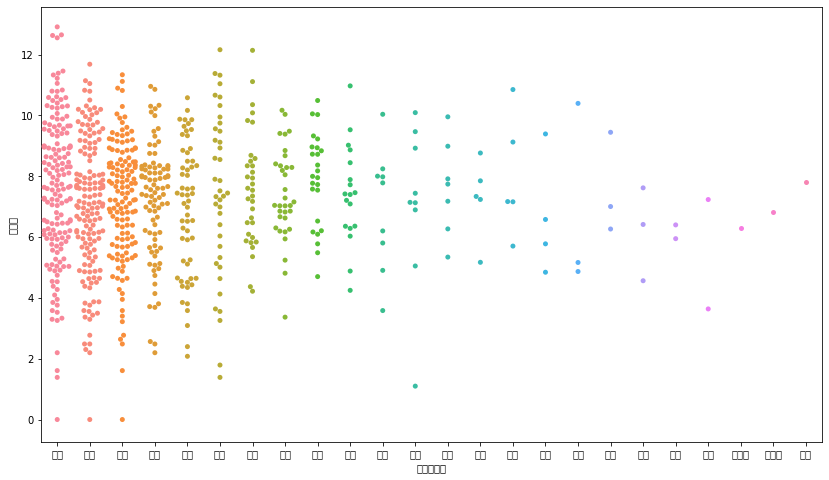

In [22]:
'''美化版小提琴图'''
#help(sns.swarmplot)

plt.figure(figsize=(14,8))
sns.swarmplot(x = '店铺所在地', y=log(mask['评价数']), data = mask,order = mask['店铺所在地'].value_counts().index)

<Figure size 216x216 with 0 Axes>

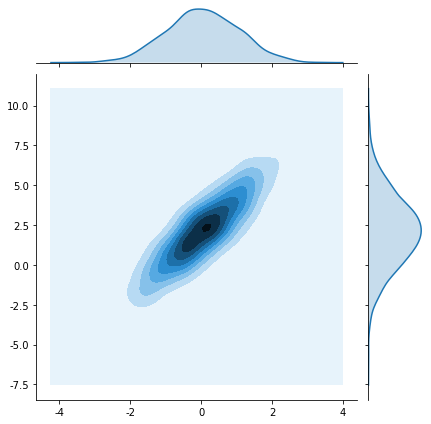

In [23]:
x = np.random.normal(0,1,1000)
y = x*2+np.random.normal(2,1,1000)

fig=plt.figure(figsize=(3,3))
sns.jointplot(x,y,kind = 'kde')

plt.show()